# Imports

In [1]:
import pandas as pd
import datetime
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from matplotlib import colors
from matplotlib.colors import ListedColormap
import numpy as np
from numpy import nan
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading Data &amp; Visualizations

In [2]:
market_df = pd.read_csv('marketing_campaign.csv', sep='\t', lineterminator='\r')

In [3]:
market_df['Dt_Customer'] = pd.to_datetime(market_df['Dt_Customer'], format="%d-%m-%Y")

In [4]:
market_df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0     \n5524      1957.0  Graduation         Single  58138.0      0.0   
1     \n2174      1954.0  Graduation         Single  46344.0      1.0   
2     \n4141      1965.0  Graduation       Together  71613.0      0.0   
3     \n6182      1984.0  Graduation       Together  26646.0      1.0   
4     \n5324      1981.0         PhD        Married  58293.0      1.0   
...      ...         ...         ...            ...      ...      ...   
2236  \n4001      1946.0         PhD       Together  64014.0      2.0   
2237  \n7270      1981.0  Graduation       Divorced  56981.0      0.0   
2238  \n8235      1956.0      Master       Together  69245.0      0.0   
2239  \n9405      1954.0         PhD        Married  52869.0      1.0   
2240      \n         NaN         NaN            NaN      NaN      NaN   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0          0.0  2012-09-04     58.0     635.0  ...                7.0   
1          1.0  2014-03-08     38.0      11.0  ...                5.0   
2          0.0  2013-08-21     26.0     426.0  ...                4.0   
3          0.0  2014-02-10     26.0      11.0  ...                6.0   
4          0.0  2014-01-19     94.0     173.0  ...                5.0   
...        ...         ...      ...       ...  ...                ...   
2236       1.0  2014-06-10     56.0     406.0  ...                7.0   
2237       0.0  2014-01-25     91.0     908.0  ...                6.0   
2238       1.0  2014-01-24      8.0     428.0  ...                3.0   
2239       1.0  2012-10-15     40.0      84.0  ...                7.0   
2240       NaN         NaT      NaN       NaN  ...                NaN   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0              0.0           0.0           0.0           0.0           0.0   
1              0.0           0.0           0.0           0.0           0.0   
2              0.0           0.0           0.0           0.0           0.0   
3              0.0           0.0           0.0           0.0           0.0   
4              0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
2236           0.0           0.0           0.0           1.0           0.0   
2237           0.0           1.0           0.0           0.0           0.0   
2238           0.0           0.0           0.0           0.0           0.0   
2239           0.0           0.0           0.0           0.0           0.0   
2240           NaN           NaN           NaN           NaN           NaN   

      Complain  Z_CostContact  Z_Revenue  Response  
0          0.0            3.0       11.0       1.0  
1          0.0            3.0       11.0       0.0  
2          0.0            3.0       11.0       0.0  
3          0.0            3.0       11.0       0.0  
4          0.0            3.0       11.0       0.0  
...        ...            ...        ...       ...  
2236       0.0            3.0       11.0       0.0  
2237       0.0            3.0       11.0       0.0  
2238       0.0            3.0       11.0       0.0  
2239       0.0            3.0       11.0       1.0  
2240       NaN            NaN        NaN       NaN  

[2241 rows x 29 columns]

In [54]:
_deepnote_run_altair(market_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Year_Birth","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"NumCatalogPurchases","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"aggregate":"average"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [53]:
_deepnote_run_altair(market_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Year_Birth","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"NumStorePurchases","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"bin":false,"aggregate":"average"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [7]:
_deepnote_run_altair(market_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Year_Birth","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"NumWebPurchases","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"aggregate":"average"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [8]:
_deepnote_run_altair(market_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Marital_Status","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Income","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"aggregate":"median"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [9]:
_deepnote_run_altair(market_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Education","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"Income","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true},"bin":false,"aggregate":"median"},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [5]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2241 non-null   object        
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [10]:
market_df.describe(include='all')

<ipython-input-10-e6abb210b195>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  market_df.describe(include='all')


ID   Year_Birth   Education Marital_Status         Income  \
count     2241  2240.000000        2240           2240    2216.000000   
unique    2241          NaN           5              8            NaN   
top     \n2727          NaN  Graduation        Married            NaN   
freq         1          NaN        1127            864            NaN   
first      NaN          NaN         NaN            NaN            NaN   
last       NaN          NaN         NaN            NaN            NaN   
mean       NaN  1968.805804         NaN            NaN   52247.251354   
std        NaN    11.984069         NaN            NaN   25173.076661   
min        NaN  1893.000000         NaN            NaN    1730.000000   
25%        NaN  1959.000000         NaN            NaN   35303.000000   
50%        NaN  1970.000000         NaN            NaN   51381.500000   
75%        NaN  1977.000000         NaN            NaN   68522.000000   
max        NaN  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome          Dt_Customer      Recency  \
count   2240.000000  2240.000000                 2240  2240.000000   
unique          NaN          NaN                  663          NaN   
top             NaN          NaN  2012-08-31 00:00:00          NaN   
freq            NaN          NaN                   12          NaN   
first           NaN          NaN  2012-07-30 00:00:00          NaN   
last            NaN          NaN  2014-06-29 00:00:00          NaN   
mean       0.444196     0.506250                  NaN    49.109375   
std        0.538398     0.544538                  NaN    28.962453   
min        0.000000     0.000000                  NaN     0.000000   
25%        0.000000     0.000000                  NaN    24.000000   
50%        0.000000     0.000000                  NaN    49.000000   
75%        1.000000     1.000000                  NaN    74.000000   
max        2.000000     2.000000                  NaN    99.000000   

           MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count   2240.000000  ...        2240.000000   2240.000000   2240.000000   
unique          NaN  ...                NaN           NaN           NaN   
top             NaN  ...                NaN           NaN           NaN   
freq            NaN  ...                NaN           NaN           NaN   
first           NaN  ...                NaN           NaN           NaN   
last            NaN  ...                NaN           NaN           NaN   
mean     303.935714  ...           5.316518      0.072768      0.074554   
std      336.597393  ...           2.426645      0.259813      0.262728   
min        0.000000  ...           0.000000      0.000000      0.000000   
25%       23.750000  ...           3.000000      0.000000      0.000000   
50%      173.500000  ...           6.000000      0.000000      0.000000   
75%      504.250000  ...           7.000000      0.000000      0.000000   
max     1493.000000  ...          20.000000      1.000000      1.000000   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count    2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
unique           NaN           NaN           NaN          NaN            NaN   
top              NaN           NaN           NaN          NaN            NaN   
freq             NaN           NaN           NaN          NaN            NaN   
first            NaN           NaN           NaN          NaN            NaN   
last             NaN           NaN           NaN          NaN            NaN   
mean        0.072768      0.064286      0.013393     0.009375            3.0   
std         0.259813      0.245316      0.114976     0.096391            0.0   
min         0.000000      0.000000      0.000000     0.000000            3.0   
25%         0.000000      0.000000      0.000000     0.000000            3.0   
50%         0.000000      0.000000      0.000000     0.000000            3.0 

In [11]:
market_df.isnull().any()

ID                     False
Year_Birth              True
Education               True
Marital_Status          True
Income                  True
Kidhome                 True
Teenhome                True
Dt_Customer             True
Recency                 True
MntWines                True
MntFruits               True
MntMeatProducts         True
MntFishProducts         True
MntSweetProducts        True
MntGoldProds            True
NumDealsPurchases       True
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases       True
NumWebVisitsMonth       True
AcceptedCmp3            True
AcceptedCmp4            True
AcceptedCmp5            True
AcceptedCmp1            True
AcceptedCmp2            True
Complain                True
Z_CostContact           True
Z_Revenue               True
Response                True
dtype: bool

# Data Cleaning

In [12]:
filtered_df = market_df.copy()
filtered_df.head(20)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   \n5524      1957.0  Graduation         Single  58138.0      0.0       0.0   
1   \n2174      1954.0  Graduation         Single  46344.0      1.0       1.0   
2   \n4141      1965.0  Graduation       Together  71613.0      0.0       0.0   
3   \n6182      1984.0  Graduation       Together  26646.0      1.0       0.0   
4   \n5324      1981.0         PhD        Married  58293.0      1.0       0.0   
5   \n7446      1967.0      Master       Together  62513.0      0.0       1.0   
6    \n965      1971.0  Graduation       Divorced  55635.0      0.0       1.0   
7   \n6177      1985.0         PhD        Married  33454.0      1.0       0.0   
8   \n4855      1974.0         PhD       Together  30351.0      1.0       0.0   
9   \n5899      1950.0         PhD       Together   5648.0      1.0       1.0   
10  \n1994      1983.0  Graduation        Married      NaN      1.0       0.0   
11   \n387      1976.0       Basic        Married   7500.0      0.0       0.0   
12  \n2125      1959.0  Graduation       Divorced  63033.0      0.0       0.0   
13  \n8180      1952.0      Master       Divorced  59354.0      1.0       1.0   
14  \n2569      1987.0  Graduation        Married  17323.0      0.0       0.0   
15  \n2114      1946.0         PhD         Single  82800.0      0.0       0.0   
16  \n9736      1980.0  Graduation        Married  41850.0      1.0       1.0   
17  \n4939      1946.0  Graduation       Together  37760.0      0.0       0.0   
18  \n6565      1949.0      Master        Married  76995.0      0.0       1.0   
19  \n2278      1985.0    2n Cycle         Single  33812.0      1.0       0.0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0   2012-09-04     58.0     635.0  ...                7.0           0.0   
1   2014-03-08     38.0      11.0  ...                5.0           0.0   
2   2013-08-21     26.0     426.0  ...                4.0           0.0   
3   2014-02-10     26.0      11.0  ...                6.0           0.0   
4   2014-01-19     94.0     173.0  ...                5.0           0.0   
5   2013-09-09     16.0     520.0  ...                6.0           0.0   
6   2012-11-13     34.0     235.0  ...                6.0           0.0   
7   2013-05-08     32.0      76.0  ...                8.0           0.0   
8   2013-06-06     19.0      14.0  ...                9.0           0.0   
9   2014-03-13     68.0      28.0  ...               20.0           1.0   
10  2013-11-15     11.0       5.0  ...                7.0           0.0   
11  2012-11-13     59.0       6.0  ...                8.0           0.0   
12  2013-11-15     82.0     194.0  ...                2.0           0.0   
13  2013-11-15     53.0     233.0  ...                6.0           0.0   
14  2012-10-10     38.0       3.0  ...                8.0           0.0   
15  2012-11-24     23.0    1006.0  ...                3.0           0.0   
16  2012-12-24     51.0      53.0  ...                8.0           0.0   
17  2012-08-31     20.0      84.0  ...                7.0           0.0   
18  2013-03-28     91.0    1012.0  ...                5.0           0.0   
19  2012-11-03     86.0       4.0  ...                6.0           0.0   

    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0            0.0           0.0           0.0           0.0       0.0   
1            0.0           0.0           0.0           0.0       0.0   
2            0.0           0.0           0.0           0.0       0.0   
3            0.0           0.0           0.0           0.0       0.0   
4            0.0           0.0           0.0           0.0       0.0   
5            0.0           0.0           0.0           0.0       0.0   
6            0.0           0.0           0.0           0.0       0.0   
7            0.0           0.0           0.0           0.0       0.0   
8            0.0           0.0           0.0           0.0       0.0   
9         

In [13]:
# Dropping redundant columns
filtered_df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
filtered_df.drop(filtered_df.tail(1).index,inplace=True) # Last row was full of NaN values
filtered_df


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0         1957.0  Graduation         Single  58138.0      0.0       0.0   
1         1954.0  Graduation         Single  46344.0      1.0       1.0   
2         1965.0  Graduation       Together  71613.0      0.0       0.0   
3         1984.0  Graduation       Together  26646.0      1.0       0.0   
4         1981.0         PhD        Married  58293.0      1.0       0.0   
...          ...         ...            ...      ...      ...       ...   
2235      1967.0  Graduation        Married  61223.0      0.0       1.0   
2236      1946.0         PhD       Together  64014.0      2.0       1.0   
2237      1981.0  Graduation       Divorced  56981.0      0.0       0.0   
2238      1956.0      Master       Together  69245.0      0.0       1.0   
2239      1954.0         PhD        Married  52869.0      1.0       1.0   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0        58.0     635.0       88.0            546.0  ...                 10.0   
1        38.0      11.0        1.0              6.0  ...                  1.0   
2        26.0     426.0       49.0            127.0  ...                  2.0   
3        26.0      11.0        4.0             20.0  ...                  0.0   
4        94.0     173.0       43.0            118.0  ...                  3.0   
...       ...       ...        ...              ...  ...                  ...   
2235     46.0     709.0       43.0            182.0  ...                  3.0   
2236     56.0     406.0        0.0             30.0  ...                  2.0   
2237     91.0     908.0       48.0            217.0  ...                  3.0   
2238      8.0     428.0       30.0            214.0  ...                  5.0   
2239     40.0      84.0        3.0             61.0  ...                  1.0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                   4.0                7.0           0.0           0.0   
1                   2.0                5.0           0.0           0.0   
2                  10.0                4.0           0.0           0.0   
3                   4.0                6.0           0.0           0.0   
4                   6.0                5.0           0.0           0.0   
...                 ...                ...           ...           ...   
2235                4.0                5.0           0.0           0.0   
2236                5.0                7.0           0.0           0.0   
2237               13.0                6.0           0.0           1.0   
2238               10.0                3.0           0.0           0.0   
2239                4.0                7.0           0.0           0.0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0              0.0           0.0           0.0       0.0       1.0  
1              0.0           0.0           0.0       0.0       0.0  
2              0.0           0.0           0.0       0.0       0.0  
3              0.0           0.0           0.0       0.0       0.0  
4              0.0           0.0           0.0       0.0       0.0  
...            ...           ...           ...       ...       ...  
2235           0.0           0.0           0.0       0.0       0.0  
2236           0.0           1.0           0.0       0.0       0.0  
2237           0.0           0.0           0.0       0.0       0.0  
2238           0.0           0.0           0.0       0.0       0.0  
2239           0.0           0.0           0.0       0.0       1.0  

[2240 rows x 25 columns]

In [14]:
# Filling NaN values with median considering Education and Marital_Status
filtered_df['Income'] = filtered_df['Income'].fillna(filtered_df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean'))

In [15]:
filtered_df.isnull().sum()
# We don't have any NaN values. Time to crunch the numbers

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [16]:
# Convert year of birth to Age
filtered_df = filtered_df.rename(columns={'Year_Birth': 'Age'})
filtered_df['Age'] = 2022 - filtered_df['Age']

# Adding amount spent
filtered_df['Amount_Spent'] = filtered_df['MntWines'] + filtered_df['MntFruits'] + filtered_df['MntMeatProducts'] + filtered_df['MntFishProducts'] + filtered_df['MntSweetProducts'] + filtered_df['MntGoldProds']
filtered_df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)


# Adding number of childs
filtered_df['Children'] = filtered_df['Kidhome'] + filtered_df['Teenhome']
filtered_df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

# Adding number of purchases
filtered_df['Purchases'] = filtered_df['NumWebPurchases'] + filtered_df['NumCatalogPurchases'] + filtered_df['NumStorePurchases']
filtered_df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1, inplace=True)

filtered_df

Age   Education Marital_Status   Income  Recency  NumDealsPurchases  \
0     65.0  Graduation         Single  58138.0     58.0                3.0   
1     68.0  Graduation         Single  46344.0     38.0                2.0   
2     57.0  Graduation       Together  71613.0     26.0                1.0   
3     38.0  Graduation       Together  26646.0     26.0                2.0   
4     41.0         PhD        Married  58293.0     94.0                5.0   
...    ...         ...            ...      ...      ...                ...   
2235  55.0  Graduation        Married  61223.0     46.0                2.0   
2236  76.0         PhD       Together  64014.0     56.0                7.0   
2237  41.0  Graduation       Divorced  56981.0     91.0                1.0   
2238  66.0      Master       Together  69245.0      8.0                2.0   
2239  68.0         PhD        Married  52869.0     40.0                3.0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                   7.0           0.0           0.0           0.0   
1                   5.0           0.0           0.0           0.0   
2                   4.0           0.0           0.0           0.0   
3                   6.0           0.0           0.0           0.0   
4                   5.0           0.0           0.0           0.0   
...                 ...           ...           ...           ...   
2235                5.0           0.0           0.0           0.0   
2236                7.0           0.0           0.0           0.0   
2237                6.0           0.0           1.0           0.0   
2238                3.0           0.0           0.0           0.0   
2239                7.0           0.0           0.0           0.0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Amount_Spent  Children  \
0              0.0           0.0       0.0       1.0        1617.0       0.0   
1              0.0           0.0       0.0       0.0          27.0       2.0   
2              0.0           0.0       0.0       0.0         776.0       0.0   
3              0.0           0.0       0.0       0.0          53.0       1.0   
4              0.0           0.0       0.0       0.0         422.0       1.0   
...            ...           ...       ...       ...           ...       ...   
2235           0.0           0.0       0.0       0.0        1341.0       1.0   
2236           1.0           0.0       0.0       0.0         444.0       3.0   
2237           0.0           0.0       0.0       0.0        1241.0       0.0   
2238           0.0           0.0       0.0       0.0         843.0       1.0   
2239           0.0           0.0       0.0       1.0         172.0       2.0   

      Purchases  
0          22.0  
1           4.0  
2          20.0  
3           6.0  
4          14.0  
...         ...  
2235       16.0  
2236       15.0  
2237       18.0  
2238       21.0  
2239        8.0  

[2240 rows x 17 columns]

In [17]:
# Grouping and dropping rows filled with absurd values
filtered_df['Marital_Status'] = filtered_df['Marital_Status'].replace({'Alone': 'Single', 'Widow': 'Single', 'YOLO': 'Single', 'Divorced': 'Single', 'Married': 'Together'})
filtered_df = filtered_df.drop(filtered_df.loc[filtered_df['Marital_Status']=='Absurd'].index)
filtered_df['Education']=filtered_df['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})

# Using quantiles to delete outliers 
income_upper_limit = filtered_df['Income'].quantile(0.99)
income_lower_limit = filtered_df['Income'].quantile(0.01)
filtered_df = filtered_df[(filtered_df['Income'] <= income_upper_limit) & (filtered_df['Income'] >= income_lower_limit)]
age_lower_limit = filtered_df['Age'].quantile(0.99)
filtered_df = filtered_df[(filtered_df['Age'] <= age_lower_limit)]

# Drop some rows which were duplicates
filtered_df = filtered_df.drop_duplicates(subset=['Income','Education','Marital_Status','Age'], ignore_index=True)
filtered_df

Age     Education Marital_Status   Income  Recency  NumDealsPurchases  \
0     65.0      Graduate         Single  58138.0     58.0                3.0   
1     68.0      Graduate         Single  46344.0     38.0                2.0   
2     57.0      Graduate       Together  71613.0     26.0                1.0   
3     38.0      Graduate       Together  26646.0     26.0                2.0   
4     41.0  Postgraduate       Together  58293.0     94.0                5.0   
...    ...           ...            ...      ...      ...                ...   
1966  36.0      Graduate         Single  26816.0     50.0                1.0   
1967  55.0      Graduate       Together  61223.0     46.0                2.0   
1968  41.0      Graduate         Single  56981.0     91.0                1.0   
1969  66.0  Postgraduate       Together  69245.0      8.0                2.0   
1970  68.0  Postgraduate       Together  52869.0     40.0                3.0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                   7.0           0.0           0.0           0.0   
1                   5.0           0.0           0.0           0.0   
2                   4.0           0.0           0.0           0.0   
3                   6.0           0.0           0.0           0.0   
4                   5.0           0.0           0.0           0.0   
...                 ...           ...           ...           ...   
1966                4.0           0.0           0.0           0.0   
1967                5.0           0.0           0.0           0.0   
1968                6.0           0.0           1.0           0.0   
1969                3.0           0.0           0.0           0.0   
1970                7.0           0.0           0.0           0.0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Amount_Spent  Children  \
0              0.0           0.0       0.0       1.0        1617.0       0.0   
1              0.0           0.0       0.0       0.0          27.0       2.0   
2              0.0           0.0       0.0       0.0         776.0       0.0   
3              0.0           0.0       0.0       0.0          53.0       1.0   
4              0.0           0.0       0.0       0.0         422.0       1.0   
...            ...           ...       ...       ...           ...       ...   
1966           0.0           0.0       0.0       0.0          22.0       0.0   
1967           0.0           0.0       0.0       0.0        1341.0       1.0   
1968           0.0           0.0       0.0       0.0        1241.0       0.0   
1969           0.0           0.0       0.0       0.0         843.0       1.0   
1970           0.0           0.0       0.0       1.0         172.0       2.0   

      Purchases  
0          22.0  
1           4.0  
2          20.0  
3           6.0  
4          14.0  
...         ...  
1966        3.0  
1967       16.0  
1968       18.0  
1969       21.0  
1970        8.0  

[1971 rows x 17 columns]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


<AxesSubplot:>

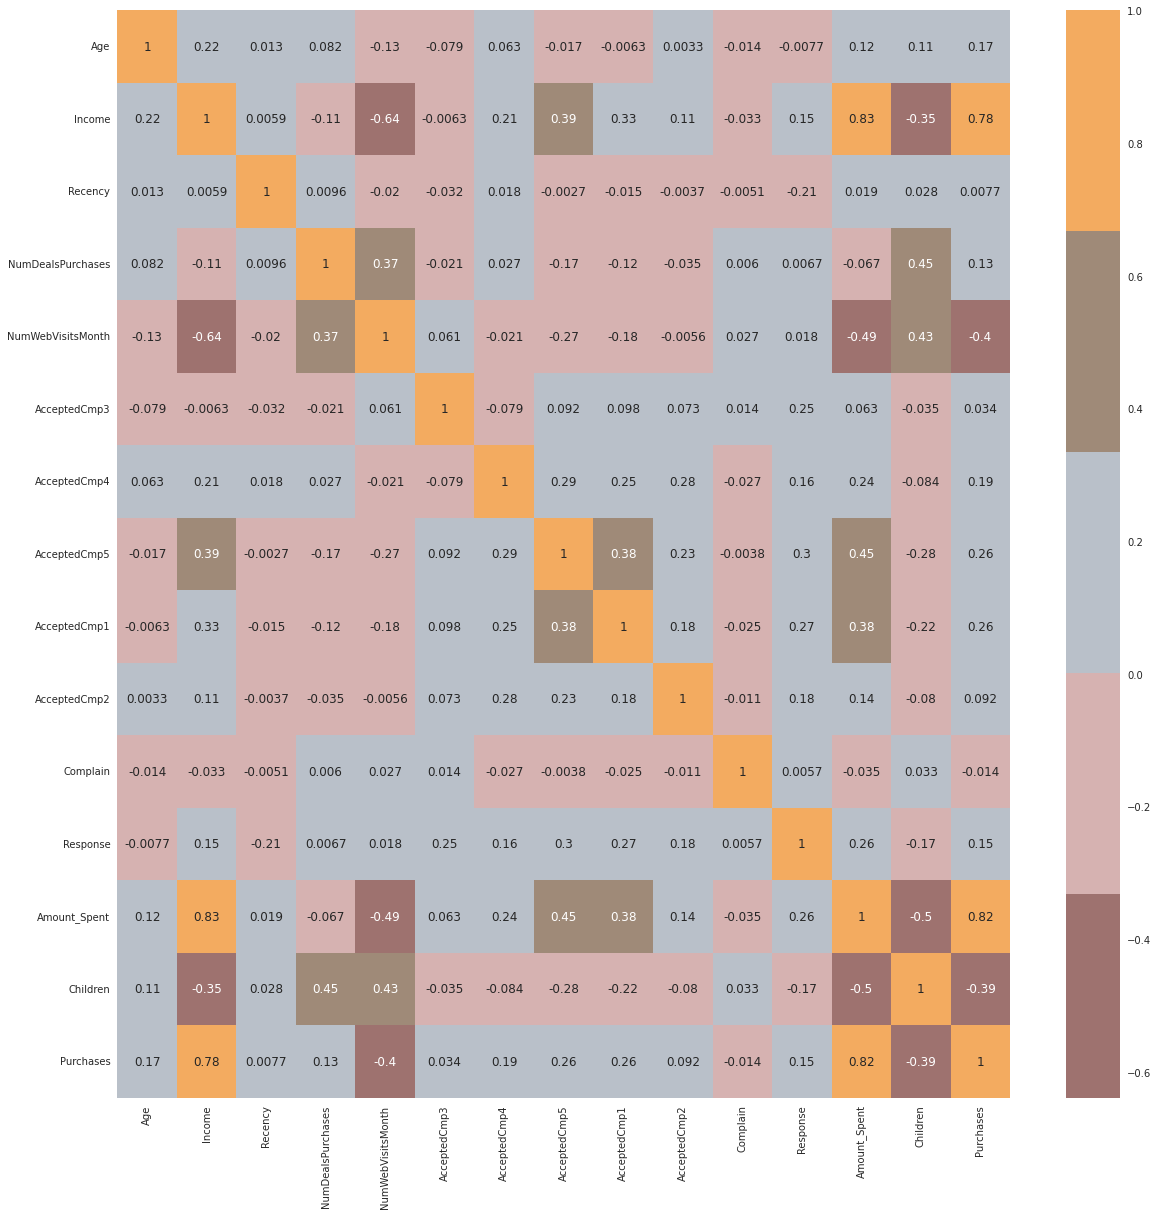

In [18]:
# Checking correlation between features
correlation_mat = filtered_df.corr()
plt.figure(figsize=(20,20))  
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(correlation_mat,annot=True, cmap=cmap, center=0)

# Data Preprocessing

In [19]:
# One hot encoding using get_dummies on the object type features
object_cols = filtered_df.select_dtypes(['object']).columns
X = pd.get_dummies(filtered_df, columns=object_cols)

# Selecting all numerical features
numeric_cols = filtered_df.select_dtypes(['float']).columns

# Scaling data
standard_scaler = StandardScaler()
standard_scaler.fit(X[numeric_cols])
X[numeric_cols] = standard_scaler.transform(X[numeric_cols])

In [20]:
X

Age    Income   Recency  NumDealsPurchases  NumWebVisitsMonth  \
0     1.041159  0.321906  0.304917           0.365670           0.737868   
1     1.302909 -0.273649 -0.387349          -0.179516          -0.137185   
2     0.343157  1.002345 -0.802709          -0.724701          -0.574711   
3    -1.314596 -1.268327 -0.802709          -0.179516           0.300342   
4    -1.052845  0.329733  1.550996           1.456040          -0.137185   
...        ...       ...       ...                ...                ...   
1966 -1.489096 -1.259743  0.028010          -0.724701          -0.574711   
1967  0.168657  0.477687 -0.110443          -0.179516          -0.137185   
1968 -1.052845  0.263481  1.447156          -0.724701           0.300342   
1969  1.128409  0.882769 -1.425749          -0.179516          -1.012238   
1970  1.302909  0.055840 -0.318123           0.365670           0.737868   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0        -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
1        -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
2        -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
3        -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
4        -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
...            ...           ...           ...           ...           ...   
1966     -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
1967     -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
1968     -0.279692      3.535534     -0.264637     -0.257989     -0.113344   
1969     -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   
1970     -0.279692     -0.282843     -0.264637     -0.257989     -0.113344   

      Complain  Response  Amount_Spent  Children  Purchases  \
0    -0.096003  2.422312      1.705581 -1.296348   1.342174   
1    -0.096003 -0.412829     -0.962549  1.383361  -1.200281   
2    -0.096003 -0.412829      0.294325 -1.296348   1.059679   
3    -0.096003 -0.412829     -0.918920  0.043506  -0.917786   
4    -0.096003 -0.412829     -0.299712  0.043506   0.212194   
...        ...       ...           ...       ...        ...   
1966 -0.096003 -0.412829     -0.970940 -1.296348  -1.341529   
1967 -0.096003 -0.412829      1.242434  0.043506   0.494689   
1968 -0.096003 -0.412829      1.074627 -1.296348   0.777184   
1969 -0.096003 -0.412829      0.406755  0.043506   1.200926   
1970 -0.096003  2.422312     -0.719229  1.383361  -0.635291   

      Education_Graduate  Education_Postgraduate  Education_Undergraduate  \
0                      1                       0                        0   
1                      1                       0                        0   
2                      1                       0                        0   
3                      1                       0                        0   
4                      0                       1                        0   
...                  ...                     ...                      ...   
1966                   1                       0                        0   
1967                   1                       0                        0   
1968                   1                       0                        0   
1969                   0                       1                        0   
1970                   0                       1                        0   

      Marital_Status_Single  Marital_Status_Together  
0                         1                        0  
1                         1                        0  
2                         0                        1  
3                         0                        1  
4                         0                        1  
...                     ...                      ...  
1966                      1                        0  
1967                      0            

# Dimensionality Reduction

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


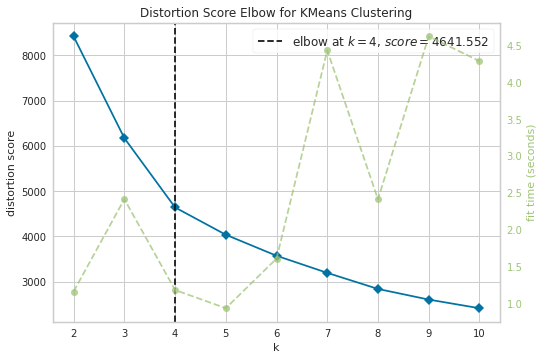

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# PCA is used for Dimensionality Reduction and removes Multicollinearity between features
pca = PCA(n_components=3)
pca.fit(X)
PCA_X = pd.DataFrame(pca.transform(X), columns=['col1', 'col2', 'col3'])

# Elbow technique to choose the right number of clusters
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(PCA_X)
elbow.show()

# Clustering

In [22]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
predict = kmeans.fit_predict(PCA_X)

filtered_df['Clusters'] = predict

# Customer Analysis

In [23]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

cluster0_val = filtered_df[filtered_df["Clusters"]==0].shape[0]
cluster1_val = filtered_df[filtered_df["Clusters"]==1].shape[0]
cluster2_val = filtered_df[filtered_df["Clusters"]==2].shape[0]
cluster3_val = filtered_df[filtered_df["Clusters"]==3].shape[0]
values = [cluster0_val, cluster1_val, cluster2_val, cluster3_val]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = 0.5, title="Clusters")])
fig.show()

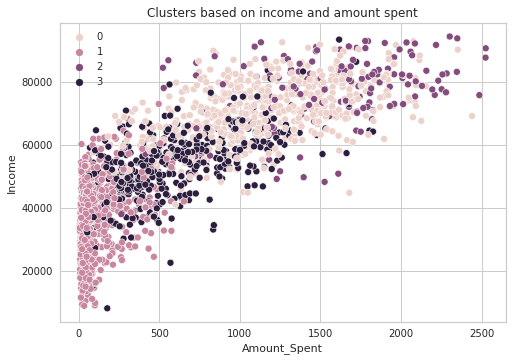

In [24]:
plot = sns.scatterplot(x = filtered_df['Amount_Spent'], y = filtered_df['Income'], hue = filtered_df['Clusters'])
plot.set_title('Clusters based on income and amount spent')
plt.legend()
plt.show()

Cluster 0 contains the high income and medium amount spent customers. 

Cluster 1 contains the low income and low amount spent customers. 

Cluster 2 contains the high income and high amount spent customers.

Cluster 3 contains the medium income and low amount spent customers.


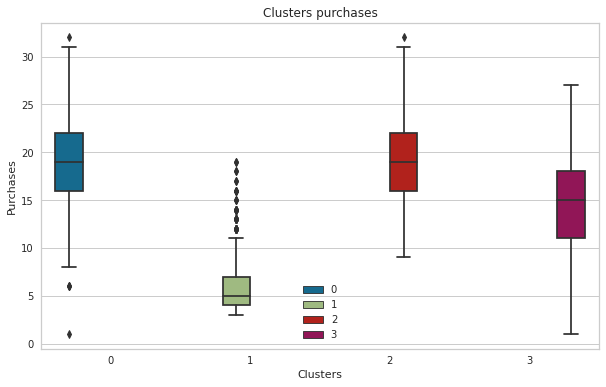

In [25]:
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x = filtered_df['Clusters'], y = filtered_df['Purchases'], hue = filtered_df['Clusters'])
plot.set_title('Clusters purchases')
plt.legend()
plt.show()

Cluster 0 contains the customers who buy the most.

Cluster 1 contains the customers who buy the least.

Cluster 2 contains the customers who buy the most.

Cluster 3 contains average buyers. 

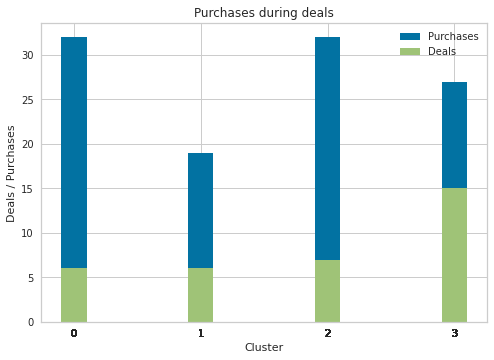

In [48]:
ax = plt.subplot()
ax.bar(filtered_df['Clusters'], filtered_df['Purchases'], width=0.2, color='b', align='center', tick_label=filtered_df['Clusters'], label = 'Purchases')
ax.bar(filtered_df['Clusters'], filtered_df['NumDealsPurchases'], width=0.2, color='g', align='center', tick_label=filtered_df['Clusters'], label = 'Deals')

ax.set_title('Purchases during deals')
plt.xlabel('Cluster')
plt.ylabel('Deals / Purchases')
ax.legend()
plt.show()

Cluster 0 contains customers who are not affected by deals.

Cluster 1 contains customers who are not affected by deals.

Cluster 2 contains customers who are not affected by deals.

Cluster 3 contains customers who buys more during deals.

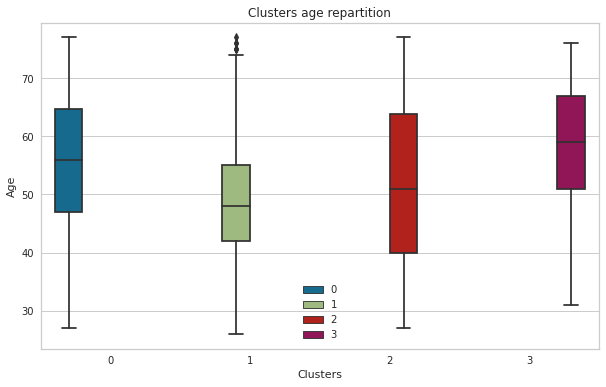

In [26]:
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x = filtered_df['Clusters'], y = filtered_df['Age'], hue = filtered_df['Clusters'])
plot.set_title('Clusters age repartition')
plt.legend()
plt.show()

Cluster 0 contains the elderly customers.

Cluster 1 contains the youngers customers.

Cluster 2 contains middle aged customers.

Cluster 3 contains the elderly customers. 

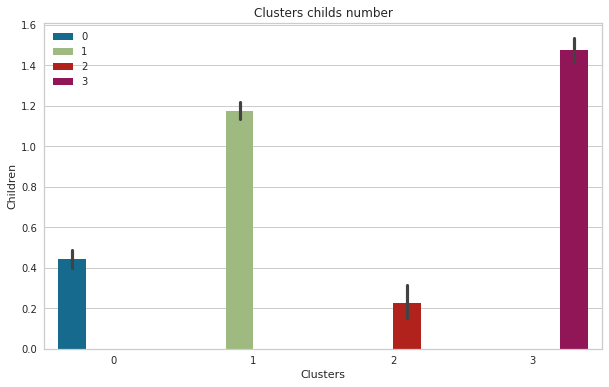

In [27]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x = filtered_df['Clusters'], y = filtered_df['Children'], hue = filtered_df['Clusters'])
plot.set_title('Clusters childs number')
plt.legend()
plt.show()

Cluster 0 contains customers with a low number of childs at home.

Cluster 1 contains customers with a high number of childs at home.

Cluster 2 contains customers with a low number of childs at home.

Cluster 3 contains customers with a high number of childs at home. 

# Conclusion

Cluster 0 profile : 

- High income and medium amount spent.
- Many purchases.
- Most of their purchases are made outside deals.
- Elderly customers.
- Low number of childs at home.

Cluster 1 profile : 

- Low income and low amount spent.
- Least purchases.
- Most of their purchases are made outside deals.
- Youngers customers.
- High number of childs at home.

Cluster 2 profile :

- High income and high amount spent.
- Many purchases.
- Most of their purchases are made outside deals.
- Middle aged customers.
- Low number of childs at home.

Cluster 3 profile :

- Medium income and low amount spent.
- Average number of purchase.
- More than half of their purchases are made during deals.
- Elderly customers.
- High number of childs at home.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e65b1e26-2a7d-49b6-a96e-556eba264425' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>